In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

import sklearn

import requests
import json

import matplotlib.pyplot as plt
import mplcyberpunk
from matplotlib import rc
import seaborn as sns

plt.style.use('cyberpunk')

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='AppleGothic')

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
with open('./config.json', 'r') as f:
    config = json.load(f)

In [3]:
config['api_key']

'10E0Q11L9OP2VEVT6XMK'

In [4]:
class EcosApi():
    def __init__(self, config):
        self.api_key = config['api_key']
        self.base_url = "https://ecos.bok.or.kr/api"
    
    def get_statistic_table_list(self, code, cycle, start_i, end_i, start_date, end_date):
        service_name = "StatisticSearch"
        req_type = "xml"
        lang_type = "kr"
        start_i = start_i
        end_i = end_i
        start_date = start_date
        end_date = end_date
        code = code
        cycle = cycle
        
        url = f"{self.base_url}/{service_name}/{self.api_key}/{req_type}/{lang_type}/{start_i}/{end_i}/{code}/{cycle}/{start_date}/{end_date}"
        print(url)
        
        req = requests.get(url)
        soup = BeautifulSoup(req.text, 'lxml')
        item_name1_li = [x.get_text() for x in soup.select('item_name1')]
        item_name2_li = [x.get_text() for x in soup.select('item_name2')]
        item_name3_li = [x.get_text() for x in soup.select('item_name3')]
        item_name4_li = [x.get_text() for x in soup.select('item_name4')]
        item_name1_li = [f"{a}_{b}_{c}_{d}" for a, b, c, d in zip(item_name1_li, 
                                                                  item_name2_li,
                                                                  item_name3_li,
                                                                  item_name4_li,)]
        time_li = [x.get_text() for x in soup.select('time')]
        data_value_li = [x.get_text() for x in soup.select('data_value')]

        df = pd.DataFrame(data={
            'item':item_name1_li,
            'date':time_li,
            'value':data_value_li
        })

        df = df.reset_index(drop=True).replace('',np.nan).pivot_table(index='date', columns='item', values='value')
        return df, soup


In [5]:
ecos = EcosApi(config=config)

In [6]:
# 상권별 오피스임대가격지수
code = "901Y096"
cycle = "Q"
start_i = 1
end_i = 100000
start_date = "2015Q1"  
end_date = "2024Q2"
data_office, soup = ecos.get_statistic_table_list(code, cycle, start_i, end_i, start_date, end_date)
data_office

https://ecos.bok.or.kr/api/StatisticSearch/10E0Q11L9OP2VEVT6XMK/xml/kr/1/100000/901Y096/Q/2015Q1/2024Q2


item,강원___,경기___,경남___,경북___,광주___,대구___,대전___,부산___,서울___,울산___,인천___,전국___,전남___,전북___,제주___,충남___,충북___
date,,,,,,,,,,,,,,,,,
2015Q1,105.7,100.1,108.3,108.2,112.0,105.1,106.5,108.6,102.4,109.3,106.0,103.6,108.9,102.7,102.6,112.8,113.1
2015Q2,105.7,100.0,108.3,107.9,111.8,104.3,106.5,108.5,102.3,109.1,106.0,103.5,108.6,102.7,102.6,112.7,113.0
2015Q3,108.7,99.7,108.3,107.9,111.6,104.1,106.5,108.5,102.0,108.9,106.0,103.3,108.4,102.2,102.6,111.8,112.4
2015Q4,105.6,99.7,108.0,107.9,111.0,104.1,106.6,108.5,102.1,108.9,106.0,103.3,108.1,102.4,102.6,110.8,112.4
2016Q1,105.6,99.4,108.3,107.5,109.9,104.0,106.6,108.5,102.0,108.7,106.1,103.2,108.1,102.4,102.6,110.8,112.4
2016Q2,105.4,99.4,107.6,107.5,109.7,104.0,107.0,108.5,102.0,108.1,105.8,103.2,108.0,102.4,102.6,110.8,112.2
2016Q3,105.4,99.4,107.2,107.3,109.8,104.0,106.4,108.8,101.9,107.2,105.9,103.1,107.9,103.3,102.6,110.8,112.2
2016Q4,104.5,99.4,106.4,107.0,109.5,103.9,106.2,108.6,101.8,105.5,105.8,103.0,107.3,103.3,102.6,110.8,111.9
2017Q1,104.5,99.5,106.4,106.9,110.0,103.9,106.4,108.9,101.8,105.3,105.7,103.0,107.7,103.3,102.2,110.8,111.9


In [7]:
data_office.columns

Index(['강원___', '경기___', '경남___', '경북___', '광주___', '대구___', '대전___', '부산___',
       '서울___', '울산___', '인천___', '전국___', '전남___', '전북___', '제주___', '충남___',
       '충북___'],
      dtype='object', name='item')

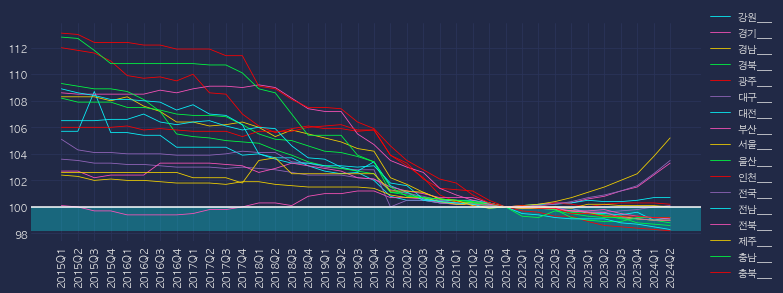

In [8]:
plt.figure(figsize=(12,4))
plt.plot(data_office, linewidth=0.8)

plt.axhline(y=100)
plt.axhspan(ymax=100, ymin=data_office.min().min(), alpha=0.3)
plt.xticks(rotation=90)
plt.legend(data_office.columns, bbox_to_anchor=(1,1.1))
plt.show()

In [9]:
data_office.iloc[-1,:].sort_values(ascending=False)

item
서울___    105.2
전국___    103.5
경기___    103.3
대전___    100.7
인천___    100.2
대구___    100.1
제주___    100.0
울산___     99.2
강원___     99.2
충북___     99.2
전북___     99.1
부산___     99.0
경남___     99.0
경북___     98.8
충남___     98.6
전남___     98.3
광주___     98.2
Name: 2024Q2, dtype: float64

In [10]:
# 상권별 상가임대가격지수
code = "901Y097"
cycle = "Q"
start_i = 1
end_i = 100000
start_date = "2015Q1"
end_date = "2024Q2"
data_store, soup = ecos.get_statistic_table_list(code, cycle, start_i, end_i, start_date, end_date)
data_store

https://ecos.bok.or.kr/api/StatisticSearch/10E0Q11L9OP2VEVT6XMK/xml/kr/1/100000/901Y097/Q/2015Q1/2024Q2


item,강원___,경기___,경남___,경북___,광주___,대구___,대전___,부산___,서울___,세종___,울산___,인천___,전국___,전남___,전북___,제주___,충남___,충북___
date,,,,,,,,,,,,,,,,,,
2015Q1,102.3,102.1,110.0,109.3,104.5,103.7,103.3,101.8,102.2,NaN,107.9,100.7,103.7,103.3,102.6,99.3,109.7,106.8
2015Q2,103.0,101.9,110.0,109.2,105.0,103.2,103.2,102.3,102.3,NaN,108.0,100.6,103.8,103.4,103.2,99.4,109.8,106.9
2015Q3,103.1,102.0,110.1,109.1,105.9,103.5,103.2,102.5,102.3,NaN,108.1,101.5,103.9,103.5,103.5,99.4,109.0,106.7
2015Q4,103.0,101.9,109.8,109.1,104.8,103.5,103.1,102.7,102.4,NaN,108.1,101.2,103.9,103.6,103.8,99.9,108.3,106.7
2016Q1,103.1,102.2,110.5,108.9,104.8,103.8,103.5,103.0,102.5,NaN,107.9,101.2,104.0,103.8,104.1,100.0,108.5,106.7
2016Q2,102.8,102.5,109.5,108.9,104.9,103.9,103.5,103.6,102.5,NaN,107.9,101.4,104.1,104.3,104.1,100.2,108.5,106.7
2016Q3,103.0,102.7,109.1,108.8,104.6,104.1,103.0,103.7,102.5,NaN,107.7,101.9,104.1,104.3,104.3,100.7,108.4,106.4
2016Q4,102.5,102.4,108.1,108.5,104.4,104.0,103.1,103.7,102.3,112.0,107.0,101.9,103.9,104.0,104.3,100.8,108.5,106.3
2017Q1,102.4,102.4,108.0,108.4,104.3,104.1,103.3,104.0,102.4,112.0,106.8,102.0,104.0,103.9,104.5,100.7,108.5,106.8


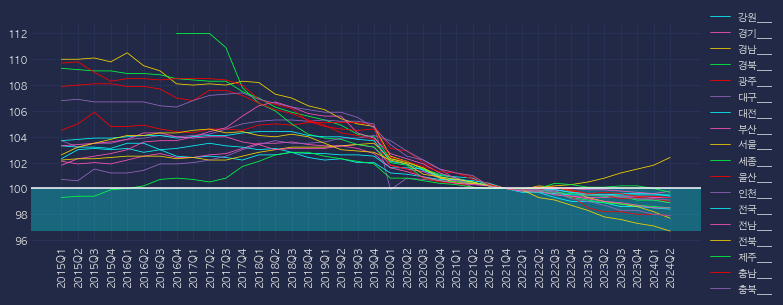

In [11]:
plt.figure(figsize=(12,4))
plt.plot(data_store, linewidth=0.8)

plt.axhline(y=100)
plt.axhspan(ymax=100, ymin=data_store.min().min(), alpha=0.3)
plt.xticks(rotation=90)
plt.legend(data_store.columns, bbox_to_anchor=(1,1.1))
plt.show()

In [12]:
data_store.iloc[-1,:].sort_values(ascending=False)

item
서울___    102.4
부산___     99.8
제주___     99.7
전국___     99.5
대전___     99.4
충남___     99.3
경기___     99.3
인천___     99.1
울산___     99.0
세종___     98.9
대구___     98.9
전남___     98.5
경북___     98.5
강원___     98.4
광주___     97.9
충북___     97.9
경남___     97.7
전북___     96.7
Name: 2024Q2, dtype: float64

In [13]:
# 지역별 주택건설인허가실적
code = "901Y105"
cycle = "M"
start_i = 1
end_i = 100000
start_date = "201501"  
end_date = "202406"
data_house, soup = ecos.get_statistic_table_list(code, cycle, start_i, end_i, start_date, end_date)
data_house

https://ecos.bok.or.kr/api/StatisticSearch/10E0Q11L9OP2VEVT6XMK/xml/kr/1/100000/901Y105/M/201501/202406


item,강원___,경기___,경남___,경북___,공공부문___,광주___,대구___,대전___,민간부문___,부문별___,...,서울___,세종___,울산___,인천___,전국___,전남___,전북___,제주___,충남___,충북___
date,,,,,,,,,,,,,,,,,,,,,
201501,830.0,11616.0,1265.0,1707.0,4740.0,113.0,912.0,211.0,28531.0,33271.0,...,3646.0,233.0,233.0,1018.0,33271.0,466.0,1404.0,1125.0,4282.0,1390.0
201502,1736.0,18812.0,5860.0,3775.0,2310.0,737.0,1186.0,1293.0,64262.0,66572.0,...,8187.0,1807.0,1001.0,2644.0,66572.0,890.0,2461.0,1642.0,8437.0,2134.0
201503,2442.0,41202.0,9141.0,8752.0,5586.0,1221.0,2397.0,3100.0,113186.0,118772.0,...,16147.0,1855.0,1262.0,3939.0,118772.0,2794.0,2995.0,2813.0,9624.0,3726.0
201504,3543.0,61958.0,11481.0,12768.0,7464.0,1420.0,4402.0,3369.0,162653.0,170117.0,...,21837.0,1893.0,2471.0,6106.0,170117.0,3943.0,3649.0,4171.0,13575.0,7299.0
201505,5415.0,84240.0,14991.0,17470.0,11196.0,3581.0,5904.0,4112.0,215782.0,226978.0,...,26436.0,1924.0,3575.0,7973.0,226978.0,4841.0,6212.0,6067.0,15856.0,8801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202402,1594.0,12660.0,4917.0,3012.0,514.0,252.0,1247.0,6146.0,48208.0,48722.0,...,4952.0,1242.0,89.0,2271.0,48722.0,1018.0,1281.0,738.0,3185.0,1924.0
202403,2563.0,21422.0,5553.0,6684.0,636.0,801.0,1264.0,10297.0,73922.0,74558.0,...,6493.0,1267.0,1128.0,2391.0,74558.0,2246.0,1426.0,959.0,4493.0,3364.0
202404,3359.0,30556.0,5766.0,6969.0,2485.0,1226.0,1286.0,12369.0,99997.0,102482.0,...,7159.0,3354.0,1890.0,3868.0,102482.0,2914.0,1587.0,1137.0,8369.0,4535.0


In [14]:
data_house_ts = data_house.copy()
data_house_ts.index = pd.Series(data_house_ts.index).apply(lambda x : datetime(int(x[:4]), int(x[-2:]), 1))
data_house_ts = data_house_ts.resample('Q').agg('mean')
data_house_ts = data_house_ts.astype('int64')
data_house_ts

item,강원___,경기___,경남___,경북___,공공부문___,광주___,대구___,대전___,민간부문___,부문별___,...,서울___,세종___,울산___,인천___,전국___,전남___,전북___,제주___,충남___,충북___
date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,1669,23876,5422,4744,4212,690,1498,1534,68659,72871,...,9326,1298,832,2533,72871,1383,2286,1860,7447,2416
2015-06-30,5189,86961,15382,17232,14064,2982,6056,3950,218327,232391,...,28208,3741,3298,7864,232391,5088,6158,6043,15831,9266
2015-09-30,10504,167209,26034,33864,29749,7377,11263,5439,428664,458413,...,61313,12438,6954,19119,458413,10589,15678,10945,22728,18396
2015-12-31,17627,245633,37099,48316,52955,12535,20619,7783,625988,678943,...,91053,14879,11517,27355,678943,13915,21390,16379,34628,29394
2016-03-31,3271,38304,9164,4550,3938,1482,1793,929,99996,103934,...,10934,640,3718,1969,103934,2886,4742,2755,4681,5381
2016-06-30,8405,95339,24923,14886,11689,7140,9629,2736,272773,284463,...,31453,1871,7841,5553,284463,8806,12314,8249,14834,14482
2016-09-30,17914,153893,42674,26419,26675,12219,16313,5943,442583,469258,...,51743,6752,11029,11929,469258,13326,16462,14665,21165,20268
2016-12-31,28130,211364,56208,34578,50106,20614,21060,10942,594847,644953,...,66993,10952,15441,18931,644953,19361,23073,19831,28679,26313
2017-03-31,3161,26223,4960,4117,5295,5685,3272,607,84864,90159,...,13759,802,507,1668,90159,2063,2713,2565,2951,9519


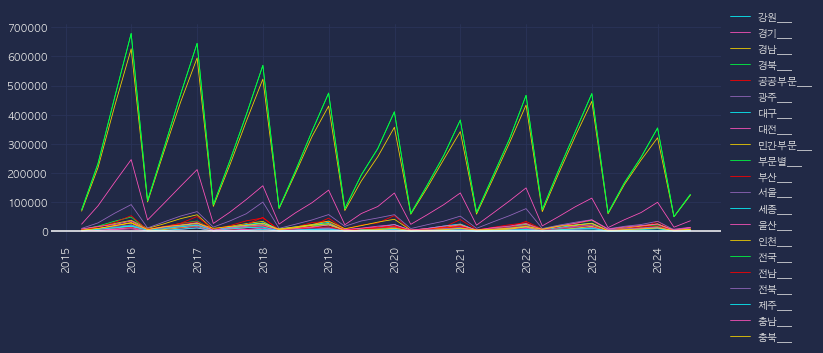

In [15]:
plt.figure(figsize=(12,4))
plt.plot(data_house_ts, linewidth=0.8)

plt.axhline(y=100)
plt.axhspan(ymax=100, ymin=data_store.min().min(), alpha=0.3)
plt.xticks(rotation=90)
plt.legend(data_house_ts.columns, bbox_to_anchor=(1,1.1))
plt.show()

In [16]:
data_house_ts.iloc[-1,:].sort_values(ascending=False)

item
전국___      126105
부문별___     126105
민간부문___    123331
경기___       35484
대전___       12967
충남___       12246
서울___       10287
부산___        9380
경북___        8157
경남___        6873
충북___        5806
인천___        5263
강원___        4558
세종___        3362
전남___        3301
공공부문___      2774
울산___        2285
전북___        2217
제주___        1321
대구___        1311
광주___        1281
Name: 2024-06-30 00:00:00, dtype: int64

In [18]:
data_house_ts_decomp = seasonal_decompose(data_house_ts['서울___'], model='additive')

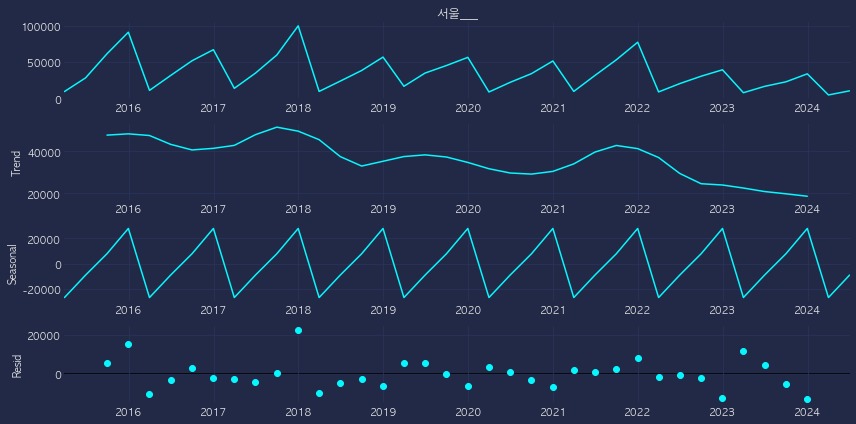

In [19]:
fig = data_house_ts_decomp.plot()
fig.set_size_inches(12,6)
plt.tight_layout()
plt.show()

In [20]:
# 가계대출연체율
code = "141Y005"
cycle = "Q"
start_i = 1
end_i = 100000
start_date = "2015Q1"  
end_date = "2024Q2"
data_loan, soup = ecos.get_statistic_table_list(code, cycle, start_i, end_i, start_date, end_date)
data_loan

https://ecos.bok.or.kr/api/StatisticSearch/10E0Q11L9OP2VEVT6XMK/xml/kr/1/100000/141Y005/Q/2015Q1/2024Q2


item,가계대출 연체율(전체1M)_강원_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_경기_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_경남_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_경북_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_광주_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_대구_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_대전_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_부산_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_서울_국내은행(수출입은행 포함)_,가계대출 연체율(전체1M)_세종_국내은행(수출입은행 포함)_,...,중소기업대출 연체율(전체1M)_서울_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_세종_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_울산_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_인천_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_전국_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_전남_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_전북_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_제주_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_충남_국내은행(수출입은행 포함)_,중소기업대출 연체율(전체1M)_충북_국내은행(수출입은행 포함)_
date,,,,,,,,,,,,,,,,,,,,,
2019Q4,0.13,0.24,0.33,0.16,0.31,0.26,0.31,0.34,0.28,0.06,...,0.67,0.06,0.44,0.15,0.44,0.21,0.38,0.30,0.17,0.14
2020Q1,0.13,0.25,0.32,0.18,0.33,0.27,0.27,0.35,0.30,0.06,...,0.75,0.13,0.26,0.22,0.53,0.28,0.55,0.22,0.19,0.31
2020Q2,0.12,0.22,0.24,0.16,0.32,0.24,0.23,0.32,0.29,0.04,...,0.68,0.08,0.21,0.16,0.44,0.19,0.40,0.24,0.20,0.18
2020Q3,0.11,0.20,0.22,0.14,0.28,0.21,0.22,0.29,0.25,0.04,...,0.59,0.03,0.19,0.19,0.40,0.17,0.37,0.28,0.17,0.14
2020Q4,0.10,0.17,0.22,0.13,0.27,0.19,0.19,0.24,0.23,0.03,...,0.60,0.24,0.22,0.12,0.36,0.15,0.35,0.28,0.08,0.10
2021Q1,0.10,0.16,0.20,0.11,0.25,0.15,0.18,0.21,0.22,0.02,...,0.63,0.06,0.17,0.09,0.37,0.20,0.37,0.44,0.11,0.10
2021Q2,0.09,0.13,0.17,0.11,0.20,0.14,0.16,0.19,0.20,0.02,...,0.52,0.15,0.16,0.13,0.31,0.20,0.39,0.28,0.12,0.17
2021Q3,0.11,0.14,0.18,0.13,0.20,0.13,0.13,0.19,0.20,0.03,...,0.48,0.08,0.09,0.10,0.30,0.25,0.35,0.25,0.17,0.09
2021Q4,0.10,0.13,0.17,0.10,0.20,0.12,0.14,0.18,0.19,0.04,...,0.45,0.09,0.16,0.08,0.27,0.23,0.24,0.16,0.13,0.08


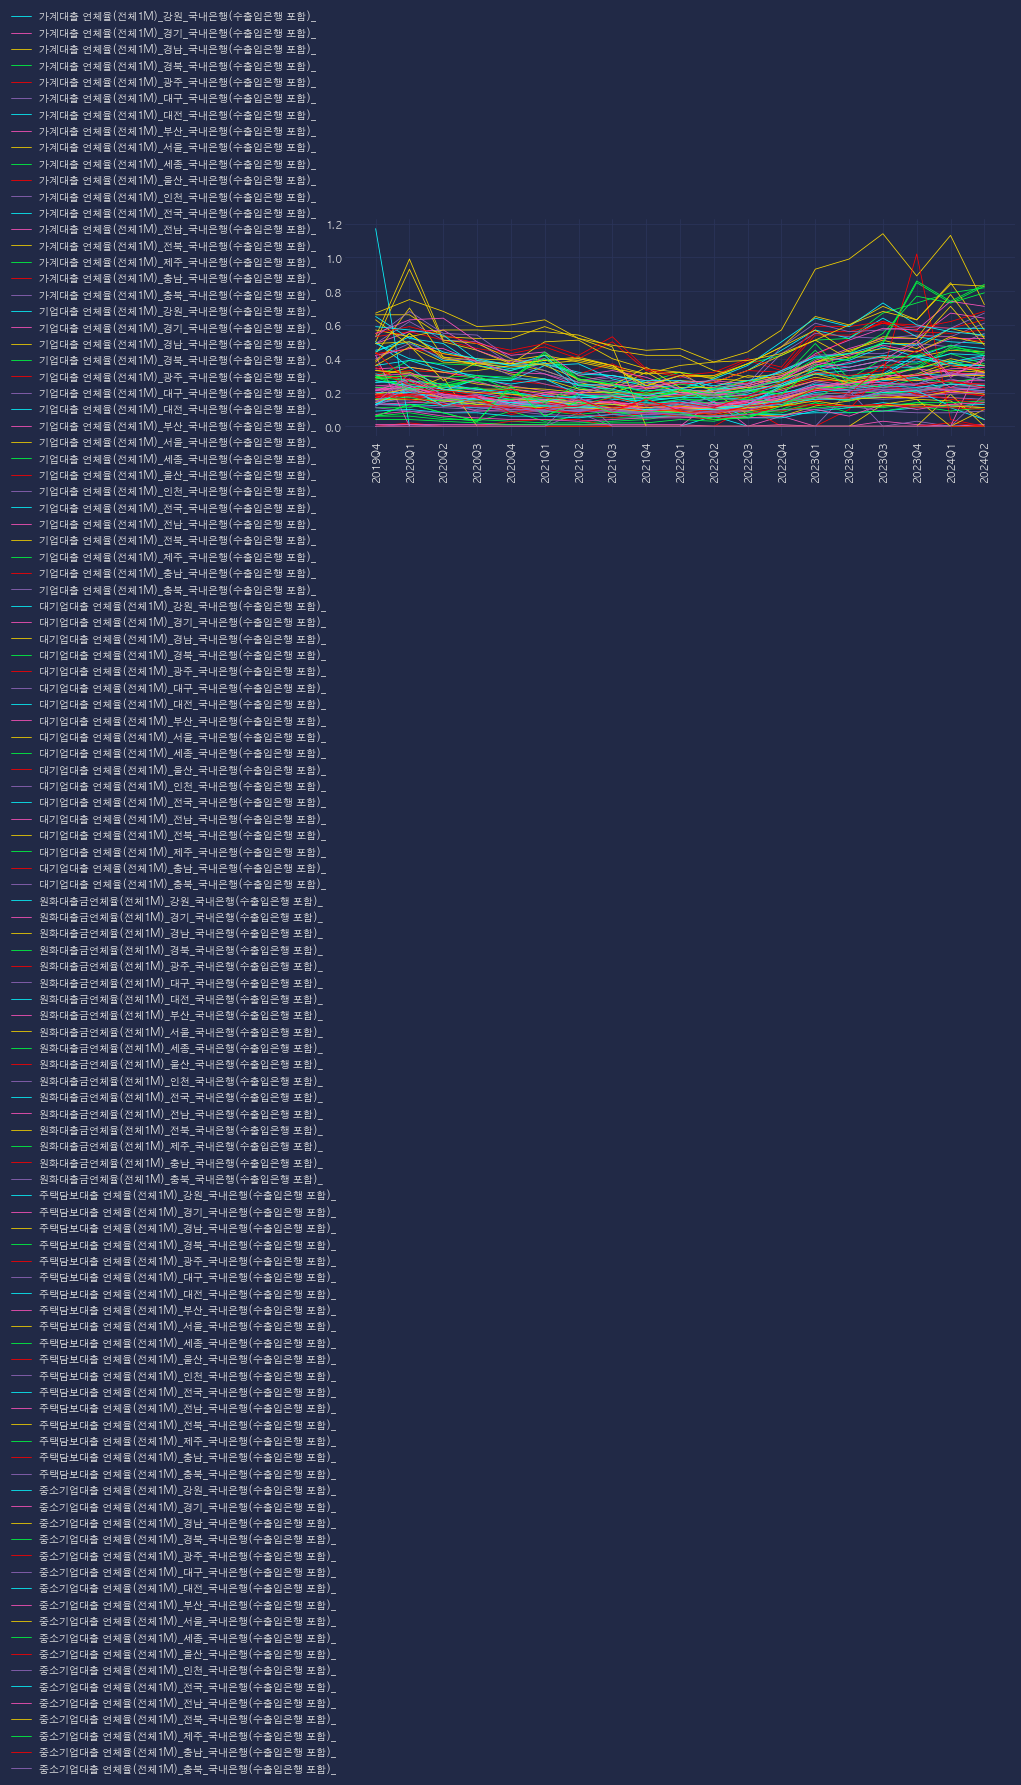

In [21]:
plt.figure(figsize=(12,4))
plt.plot(data_loan, linewidth=0.8)

plt.xticks(rotation=90)
plt.legend(data_loan.columns, bbox_to_anchor=(0,2))
plt.show()

In [30]:
target_cols_for_loan = pd.Series(data_loan.columns).apply(lambda x : x if '서울' in x else None).dropna().values
target_cols_for_loan

array(['가계대출 연체율(전체1M)_서울_국내은행(수출입은행 포함)_',
       '기업대출 연체율(전체1M)_서울_국내은행(수출입은행 포함)_',
       '대기업대출 연체율(전체1M)_서울_국내은행(수출입은행 포함)_',
       '원화대출금연체율(전체1M)_서울_국내은행(수출입은행 포함)_',
       '주택담보대출 연체율(전체1M)_서울_국내은행(수출입은행 포함)_',
       '중소기업대출 연체율(전체1M)_서울_국내은행(수출입은행 포함)_'], dtype=object)

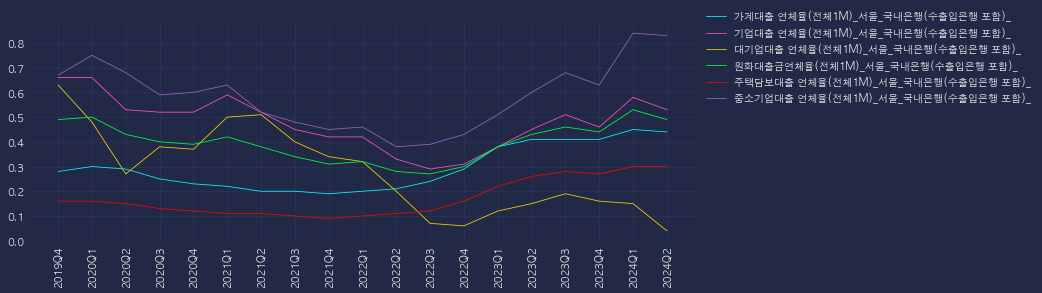

In [31]:
data_loan_seoul = data_loan[target_cols_for_loan]

plt.figure(figsize=(12,4))
plt.plot(data_loan_seoul, linewidth=0.8)

plt.xticks(rotation=90)
plt.legend(data_loan_seoul.columns, bbox_to_anchor=(1,1.1))
plt.show()

In [27]:
# 소매업태별 판매액지수
code = "901Y098"
cycle = "Q"
start_i = 1
end_i = 100000
start_date = "2015Q1"  
end_date = "2024Q2"
data_sales, soup = ecos.get_statistic_table_list(code, cycle, start_i, end_i, start_date, end_date)
data_sales

https://ecos.bok.or.kr/api/StatisticSearch/10E0Q11L9OP2VEVT6XMK/xml/kr/1/100000/901Y098/Q/2015Q1/2024Q2


item,가전·컴퓨터·통신기기 소매점_경상지수__,가전·컴퓨터·통신기기 소매점_불변지수__,대형마트_경상지수__,대형마트_계절조정지수__,대형마트_불변지수__,면세점_경상지수__,면세점_계절조정지수__,면세점_불변지수__,무점포 소매_경상지수__,무점포 소매_계절조정지수__,...,전문소매점_경상지수__,전문소매점_계절조정지수__,전문소매점_불변지수__,체인 슈퍼마켓_경상지수__,체인 슈퍼마켓_불변지수__,편의점_경상지수__,편의점_계절조정지수__,편의점_불변지수__,홈쇼핑_경상지수__,홈쇼핑_불변지수__
date,,,,,,,,,,,,,,,,,,,,,
2015Q1,109.4,105.1,97.7,105.2,105.9,58.3,60.3,56.9,45.1,47.3,...,112.9,120.2,117.2,76.8,85.4,48.8,59.6,53.8,69.0,71.6
2015Q2,109.7,106.9,93.2,105.2,101.3,59.8,59.1,58.8,46.3,48.6,...,112.4,117.1,117.4,81.4,90.8,63.9,65.4,67.3,66.8,69.7
2015Q3,112.4,108.9,104.6,106.8,113.5,50.9,47.0,50.1,45.8,49.8,...,108.5,117.8,112.8,85.6,95.2,69.3,67.3,72.5,65.1,67.8
2015Q4,113.8,111.9,92.6,105.4,101.1,68.3,67.8,68.0,52.2,51.3,...,122.7,120.8,128.0,75.9,85.4,66.3,70.4,69.8,77.8,81.0
2016Q1,105.4,104.8,97.7,102.9,104.5,70.6,73.0,69.1,52.1,53.6,...,113.2,119.2,117.3,80.5,88.1,63.0,73.1,66.0,73.6,75.9
2016Q2,112.1,107.1,91.8,102.5,98.7,78.4,77.2,76.6,53.2,55.1,...,116.5,119.4,119.7,81.2,89.8,74.2,76.1,78.5,75.4,77.5
2016Q3,118.3,112.9,107.6,108.2,115.0,81.4,76.2,80.3,53.5,57.4,...,110.2,118.2,113.2,88.3,96.7,80.5,78.6,84.7,74.2,76.3
2016Q4,110.1,107.3,96.4,106.1,102.3,86.2,86.0,86.2,60.0,58.6,...,122.1,118.2,125.5,80.7,87.1,76.1,80.2,79.4,85.1,87.6
2017Q1,102.6,100.9,97.3,101.0,101.3,90.6,95.0,89.7,58.6,60.4,...,109.9,116.2,112.6,83.2,87.7,72.8,83.0,75.1,79.1,81.0


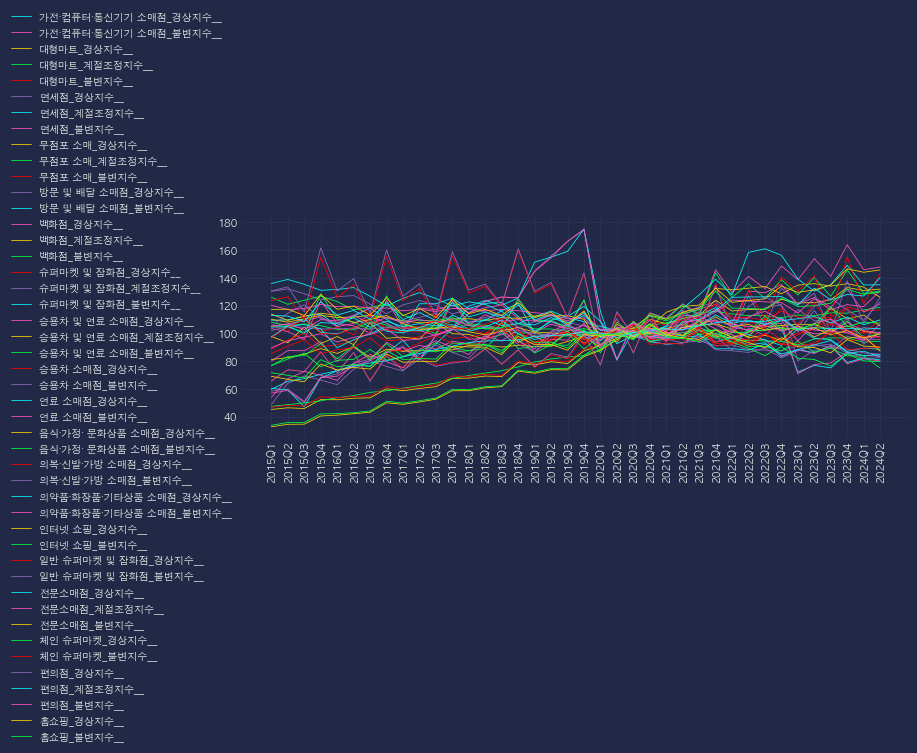

In [29]:
plt.figure(figsize=(12,4))
plt.plot(data_sales, linewidth=0.8)

plt.xticks(rotation=90)
plt.legend(data_sales.columns, bbox_to_anchor=(0,2))
plt.show()

In [32]:
target_cols_for_sales = pd.Series(data_sales.columns).apply(lambda x : x if '경상지수' in x else None).dropna().values
target_cols_for_sales

array(['가전·컴퓨터·통신기기 소매점_경상지수__', '대형마트_경상지수__', '면세점_경상지수__',
       '무점포 소매_경상지수__', '방문 및 배달 소매점_경상지수__', '백화점_경상지수__',
       '슈퍼마켓 및 잡화점_경상지수__', '승용차 및 연료 소매점_경상지수__', '승용차 소매점_경상지수__',
       '연료 소매점_경상지수__', '음식·가정· 문화상품 소매점_경상지수__', '의복·신발·가방 소매점_경상지수__',
       '의약품·화장품·기타상품 소매점_경상지수__', '인터넷 쇼핑_경상지수__', '일반 슈퍼마켓 및 잡화점_경상지수__',
       '전문소매점_경상지수__', '체인 슈퍼마켓_경상지수__', '편의점_경상지수__', '홈쇼핑_경상지수__'],
      dtype=object)

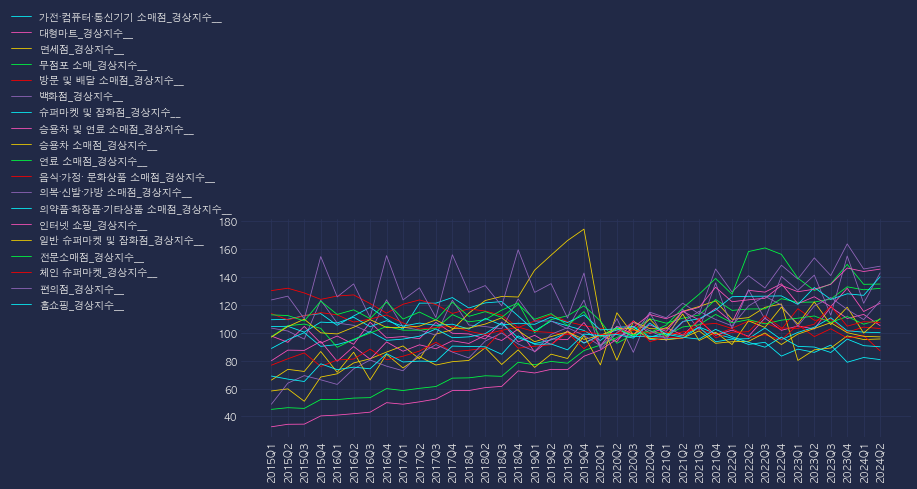

In [33]:
data_sales_base = data_sales[target_cols_for_sales]

plt.figure(figsize=(12,4))
plt.plot(data_sales_base, linewidth=0.8)

plt.xticks(rotation=90)
plt.legend(data_sales_base.columns, bbox_to_anchor=(0,2))
plt.show()

In [36]:
target_cols_big_for_sales = pd.Series(target_cols_for_sales).apply(lambda x : x if any(sub in x for sub in ['대형마트','면세점','승용차 소매점']) in x else None).dropna().values
target_cols_big_for_sales

TypeError: 'in <string>' requires string as left operand, not bool